# Facial-Emotion-Recogntion-HCL

## Environment

### System

- Os: Windows 11 64bit
- Python: 3.11.9

### Package

- pytorch: cu126 
- ipykernel: 6.29.5
- pandas: 2.2.2
- Pillow: 10.3.0
- tqdm: 4.66.4
- opencv-python: 4.11.0
- albumentations: 2.06

In [10]:
!sudo apt-get install -y libgl1 libglib2.0-0
!pip uninstall torch torchvision -y
!pip install -r requirements/requirements-normal.txt
!pip install -r requirements/requirements-pytorch.txt

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgl1 is already the newest version (1.4.0-1).
libglib2.0-0 is already the newest version (2.72.4-0ubuntu2.4).
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.
Found existing installation: torch 2.7.0
Uninstalling torch-2.7.0:
  Successfully uninstalled torch-2.7.0
Found existing installation: torchvision 0.22.0
Uninstalling torchvision-0.22.0:
  Successfully uninstalled torchvision-0.22.0
  Using cached torch-2.7.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (29 kB)
  Using cached torchvision-0.22.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (6.1 kB)
Using cached torch-2.7.0-cp312-cp312-manylinux_2_28_x86_64.whl (865.0 MB)
Using cached torchvision-0.22.0-cp312-cp312-manylinux_2_28_x86_64.whl (7.4 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency confl

In [11]:
import warnings
import pandas as pd

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)

### Import libraries

In [12]:
import torch
import gc

import scripts.augment as sa
import scripts.preprocessing as sp
import scripts.evaluate as ev
import scripts.model as md
import scripts.backbone as b

### Define constant

In [13]:
# === Define paths ===
affectnet_raw_path = "./data/affectnet/" 
processed_root_path = "./data/processed/"  
processed_metadata_csv = "./data/processed/train.csv"  
augmented_root_path = "./data/augmented/"  
augmented_metadata_csv = "./data/augmented/train.csv"  

# === Define preprocessing & augmentation parameters ===
img_size = (224, 224)   
rename_images = True   
dry_run = False       
augment_target_per_class = 8000    
augment_severity = "medium"        

### Data preprocessing

In [ ]:
# Preprocess affectnet data
processed_affectnet = sp.process_affectnet(
    affectnet_root=affectnet_raw_path,
    processed_root=processed_root_path,
    img_size=img_size,
    rename=rename_images,
    rename_width=5,
    dry_run=dry_run
)

### Data augmentation

In [ ]:
# Augment affectnet training split
augmented_affectnet = sa.augment_affectnet(
    processed_root=processed_root_path,
    aug_root=augmented_root_path,
    target=augment_target_per_class,
    severity=augment_severity
)

### Model training and evaluate

[✓] Train: 44800 | Val: 9600 | Test: 9600

=== Training pipeline for microsoft/resnet-50 ===
[INFO] Loading classification and base vision models: microsoft/resnet-50 on cuda
Fine-tuning microsoft/resnet-50...
[INFO] Fine-tuning 14,981,128/23,524,424 params (63.68%)


Epoch 1/20: 100%|██████████| 700/700 [02:55<00:00,  4.00it/s]


Epoch 1: Train 2.0657, Val 2.0472, Acc 0.2172


Epoch 2/20: 100%|██████████| 700/700 [02:44<00:00,  4.25it/s]


Epoch 2: Train 1.8815, Val 1.7543, Acc 0.3231


Epoch 3/20: 100%|██████████| 700/700 [02:44<00:00,  4.25it/s]


Epoch 3: Train 1.7510, Val 1.6907, Acc 0.3497


Epoch 4/20: 100%|██████████| 700/700 [02:44<00:00,  4.25it/s]


Epoch 4: Train 1.6966, Val 1.6487, Acc 0.3696


Epoch 5/20: 100%|██████████| 700/700 [02:44<00:00,  4.25it/s]


Epoch 5: Train 1.6603, Val 1.6089, Acc 0.3871


Epoch 6/20: 100%|██████████| 700/700 [02:44<00:00,  4.24it/s]


Epoch 6: Train 1.6308, Val 1.5863, Acc 0.3997


Epoch 7/20: 100%|██████████| 700/700 [02:44<00:00,  4.25it/s]


Epoch 7: Train 1.6137, Val 1.5764, Acc 0.4005


Epoch 8/20: 100%|██████████| 700/700 [02:44<00:00,  4.25it/s]


Epoch 8: Train 1.5916, Val 1.5518, Acc 0.4108


Epoch 9/20: 100%|██████████| 700/700 [02:44<00:00,  4.25it/s]


Epoch 9: Train 1.5772, Val 1.5436, Acc 0.4169


Epoch 10/20: 100%|██████████| 700/700 [02:44<00:00,  4.25it/s]


Epoch 10: Train 1.5603, Val 1.5318, Acc 0.4218


Epoch 11/20: 100%|██████████| 700/700 [02:44<00:00,  4.25it/s]


Epoch 11: Train 1.5516, Val 1.5201, Acc 0.4259


Epoch 12/20: 100%|██████████| 700/700 [02:44<00:00,  4.25it/s]


Epoch 12: Train 1.5411, Val 1.5105, Acc 0.4288


Epoch 13/20: 100%|██████████| 700/700 [02:44<00:00,  4.26it/s]


Epoch 13: Train 1.5347, Val 1.5067, Acc 0.4304


Epoch 14/20: 100%|██████████| 700/700 [02:44<00:00,  4.25it/s]


Epoch 14: Train 1.5283, Val 1.5031, Acc 0.4325


Epoch 15/20: 100%|██████████| 700/700 [02:44<00:00,  4.25it/s]


Epoch 15: Train 1.5276, Val 1.4972, Acc 0.4349


Epoch 16/20: 100%|██████████| 700/700 [02:44<00:00,  4.25it/s]


Epoch 16: Train 1.5215, Val 1.4971, Acc 0.4327


Epoch 17/20: 100%|██████████| 700/700 [02:44<00:00,  4.25it/s]


Epoch 17: Train 1.5143, Val 1.4940, Acc 0.4369


Epoch 18/20: 100%|██████████| 700/700 [02:44<00:00,  4.25it/s]


Epoch 18: Train 1.5194, Val 1.4945, Acc 0.4363


Epoch 19/20: 100%|██████████| 700/700 [02:44<00:00,  4.24it/s]


Epoch 19: Train 1.5167, Val 1.4943, Acc 0.4363


Epoch 20/20: 100%|██████████| 700/700 [02:44<00:00,  4.25it/s]


Epoch 20: Train 1.5111, Val 1.4943, Acc 0.4363
Training hybrid model for microsoft/resnet-50...
[INFO] Extracting features for train set
[INFO] Extracting features for val set
[INFO] Training LightGBM classifier with 44800 samples
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[99]	train's multi_logloss: 1.12635	valid's multi_logloss: 1.50932
[INFO] Training completed in 226.68 seconds
Evaluating hybrid model for microsoft/resnet-50...
[INFO] Extracting test features


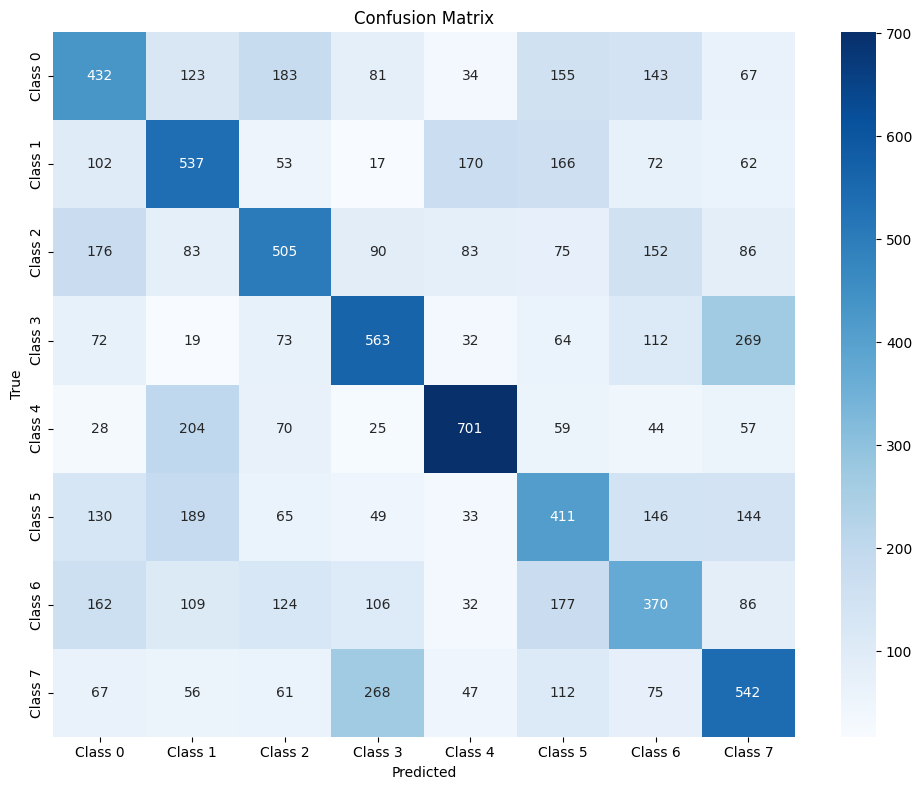

[INFO] Fine-tuned model saved to models/microsoft_resnet-50/deit_model
[INFO] Model saved to models/microsoft_resnet-50
Saved model to models/microsoft_resnet-50

=== Training pipeline for microsoft/resnet-152 ===
[INFO] Loading classification and base vision models: microsoft/resnet-152 on cuda


config.json:   0%|          | 0.00/69.6k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

Fine-tuning microsoft/resnet-152...
[INFO] Fine-tuning 14,981,128/58,160,200 params (25.76%)


Epoch 1/20: 100%|██████████| 700/700 [05:42<00:00,  2.05it/s]


Epoch 1: Train 2.0635, Val 2.0312, Acc 0.2347


Epoch 2/20: 100%|██████████| 700/700 [05:20<00:00,  2.18it/s]


Epoch 2: Train 1.8289, Val 1.7149, Acc 0.3349


Epoch 3/20: 100%|██████████| 700/700 [05:20<00:00,  2.19it/s]


Epoch 3: Train 1.7228, Val 1.6580, Acc 0.3648


Epoch 4/20: 100%|██████████| 700/700 [05:20<00:00,  2.18it/s]


Epoch 4: Train 1.6742, Val 1.6193, Acc 0.3821


Epoch 5/20: 100%|██████████| 700/700 [05:20<00:00,  2.19it/s]


Epoch 5: Train 1.6405, Val 1.5784, Acc 0.3995


Epoch 6/20: 100%|██████████| 700/700 [05:20<00:00,  2.18it/s]


Epoch 6: Train 1.6118, Val 1.5601, Acc 0.4088


Epoch 7/20: 100%|██████████| 700/700 [05:20<00:00,  2.18it/s]


Epoch 7: Train 1.5862, Val 1.5453, Acc 0.4176


Epoch 8/20: 100%|██████████| 700/700 [05:20<00:00,  2.18it/s]


Epoch 8: Train 1.5699, Val 1.5249, Acc 0.4233


Epoch 9/20: 100%|██████████| 700/700 [05:20<00:00,  2.18it/s]


Epoch 9: Train 1.5514, Val 1.5145, Acc 0.4282


Epoch 10/20: 100%|██████████| 700/700 [05:20<00:00,  2.18it/s]


Epoch 10: Train 1.5396, Val 1.5075, Acc 0.4250


Epoch 11/20: 100%|██████████| 700/700 [05:20<00:00,  2.19it/s]


Epoch 11: Train 1.5256, Val 1.4939, Acc 0.4381


Epoch 12/20: 100%|██████████| 700/700 [05:20<00:00,  2.18it/s]


Epoch 12: Train 1.5146, Val 1.4876, Acc 0.4380


Epoch 13/20: 100%|██████████| 700/700 [05:20<00:00,  2.18it/s]


Epoch 13: Train 1.5033, Val 1.4798, Acc 0.4435


Epoch 14/20: 100%|██████████| 700/700 [05:20<00:00,  2.18it/s]


Epoch 14: Train 1.5026, Val 1.4739, Acc 0.4462


Epoch 15/20: 100%|██████████| 700/700 [05:20<00:00,  2.18it/s]


Epoch 15: Train 1.4912, Val 1.4708, Acc 0.4479


Epoch 16/20: 100%|██████████| 700/700 [05:20<00:00,  2.18it/s]


Epoch 16: Train 1.4886, Val 1.4682, Acc 0.4495


Epoch 17/20: 100%|██████████| 700/700 [05:20<00:00,  2.18it/s]


Epoch 17: Train 1.4884, Val 1.4674, Acc 0.4499


Epoch 18/20: 100%|██████████| 700/700 [05:20<00:00,  2.18it/s]


Epoch 18: Train 1.4840, Val 1.4663, Acc 0.4511


Epoch 19/20: 100%|██████████| 700/700 [05:20<00:00,  2.18it/s]


Epoch 19: Train 1.4833, Val 1.4661, Acc 0.4502


Epoch 20/20: 100%|██████████| 700/700 [05:20<00:00,  2.18it/s]


Epoch 20: Train 1.4810, Val 1.4662, Acc 0.4502
Training hybrid model for microsoft/resnet-152...
[INFO] Extracting features for train set
[INFO] Extracting features for val set
[INFO] Training LightGBM classifier with 44800 samples
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[100]	train's multi_logloss: 1.1055	valid's multi_logloss: 1.49141
[INFO] Training completed in 226.99 seconds
Evaluating hybrid model for microsoft/resnet-152...
[INFO] Extracting test features


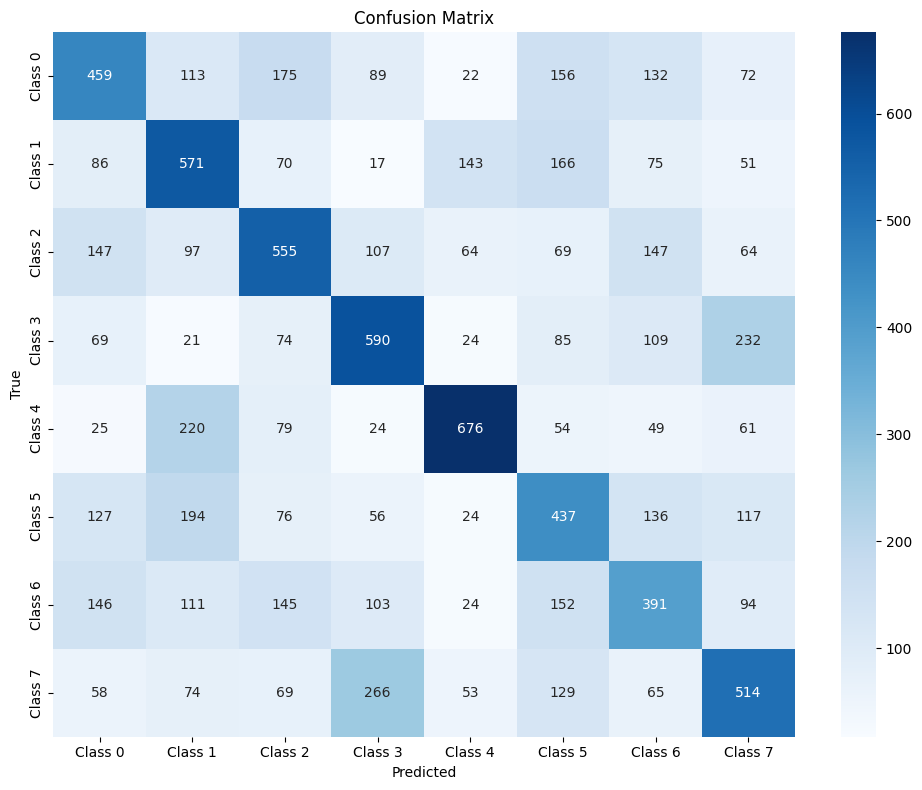

[INFO] Fine-tuned model saved to models/microsoft_resnet-152/deit_model
[INFO] Model saved to models/microsoft_resnet-152
Saved model to models/microsoft_resnet-152
All models trained and saved successfully.


In [14]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")


model_configs = [
    # ("facebook/deit-small-distilled-patch16-224", 5),
    # ("facebook/deit-base-distilled-patch16-224", 5),
    ("microsoft/resnet-50", 20),
    ("microsoft/resnet-152", 20),
    # ("timm/vit_small_patch16_224.augreg_in21k", 5),
    # ("google/vit-base-patch16-224", 5),
]

# Load data once
data_loaders = ev.load_affectnet_data(augmented_metadata_csv)
train_loader = data_loaders['train_loader']
val_loader = data_loaders['val_loader']
test_loader = data_loaders['test_loader']

# Iterate and train each backbone + hybrid classifier
for model_name, epochs in model_configs:
    print(f"\n=== Training pipeline for {model_name} ===")
    # 1. Instantiate and fine-tune backbone
    backbone = b.VisionFeatureExtractor(model_name=model_name, device=device)
    print(f"Fine-tuning {model_name}...")

    backbone.finetune(
        train_loader,
        val_loader,
        num_classes=8,
        epochs=epochs,
        learning_rate=2e-5,
        weight_decay=0.01
    )

    # Clear unused memory to prevent OOM
    del backbone.classification_model
    torch.cuda.empty_cache()
    gc.collect()

    # 2. Train hybrid classifier
    classifier = md.LightGBMClassifier()
    hybrid_model = md.HybridEmotionClassifier(backbone, classifier)
    print(f"Training hybrid model for {model_name}...")
    hybrid_model.train(train_loader, val_loader)

    # 3. Evaluate on test set
    print(f"Evaluating hybrid model for {model_name}...")
    hybrid_model.evaluate(test_loader)

    # 4. Save and cleanup
    save_path = f"models/{model_name.replace('/', '_')}"
    hybrid_model.save(save_path)
    print(f"Saved model to {save_path}")

    # Cleanup GPU memory
    del backbone
    del hybrid_model
    torch.cuda.empty_cache()
    gc.collect()

print("All models trained and saved successfully.")